In [114]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
import time
from IPython.display import display, clear_output
import glob
import os
from scipy.interpolate import InterpolatedUnivariateSpline, UnivariateSpline, splrep, splev
import scipy.signal

In [115]:
Files = glob.glob("*EC.txt")
Open_Files = []
for file in range(len(Files)):
    Temp_file = open(Files[file],'r')
    for i in Temp_file:
        Open_Files.append(i.strip("())\n"))
    Temp_file.close()
for line in range(len(Open_Files)):
    Open_Files[line] = Open_Files[line].split(',')
Open_Files = np.array([np.array(i).astype(float) for i in Open_Files])

Emissions = []
for i in Files:
    Emissions.append(int(i[-10:-6].strip("_")))
print(Emissions)

[25, 50, 100, 200, 400, 600, 800, 1000, 1200, 1400]


In [277]:
Iterator = int(len(Open_Files)/len(Files))
print(Iterator)
All_Emissions = np.zeros([len(Files),Iterator,2])
for i in range(len(Files)):
    All_Emissions[i] = Open_Files[Iterator*i:Iterator*(i+1)]
print(All_Emissions[0,:,1])

All_Emissions_Avg = np.zeros([len(Files),int([i-1 if i%2 != 0 else i for i in [Iterator]][0]/2),2])

for num,k in enumerate(All_Emissions):
    for i in range(int(len(k)/2)):
        for j in range(int(len(k)/2)):
            #if np.shape(All_Emissions)[1] %2 != 0:
            if k[i,0] == k[j,0]:
                All_Emissions_Avg[num,i] = (([k[i,0],(k[i,1]+k[j,1])/2]))

166
[ 0.0002  0.0001  0.0001  0.0001  0.0001  0.0001  0.0001  0.0001  0.0001
  0.0001 -0.0007 -0.0037 -0.0056 -0.0068 -0.0073 -0.0078 -0.0083 -0.0086
 -0.009  -0.0094 -0.0097 -0.01   -0.0103 -0.0107 -0.011  -0.0113 -0.0115
 -0.0117 -0.012  -0.0121 -0.0123 -0.0127 -0.013  -0.013  -0.0132 -0.0135
 -0.0138 -0.0141 -0.0143 -0.0145 -0.0146 -0.0147 -0.0148 -0.015  -0.0151
 -0.0151 -0.0153 -0.0154 -0.0154 -0.0154 -0.0157 -0.0158 -0.016  -0.0161
 -0.0163 -0.0165 -0.0167 -0.0169 -0.0171 -0.0173 -0.0172 -0.017  -0.0149
 -0.0125 -0.0102 -0.0093 -0.0087 -0.0082 -0.0078 -0.0075 -0.0072 -0.0069
 -0.0067 -0.0066 -0.0063 -0.0061 -0.0059 -0.0057 -0.0055 -0.0054 -0.0052
 -0.0051 -0.005  -0.005  -0.0051 -0.0053 -0.0054 -0.0056 -0.0057 -0.0059
 -0.006  -0.0062 -0.0064 -0.0066 -0.0068 -0.007  -0.0072 -0.0076 -0.0078
 -0.0084 -0.009  -0.0095 -0.011  -0.0139 -0.0165 -0.0172 -0.0173 -0.0172
 -0.017  -0.0168 -0.0168 -0.0166 -0.0165 -0.0162 -0.0161 -0.016  -0.0159
 -0.0158 -0.0157 -0.0154 -0.0152 -0.0151 -0.014

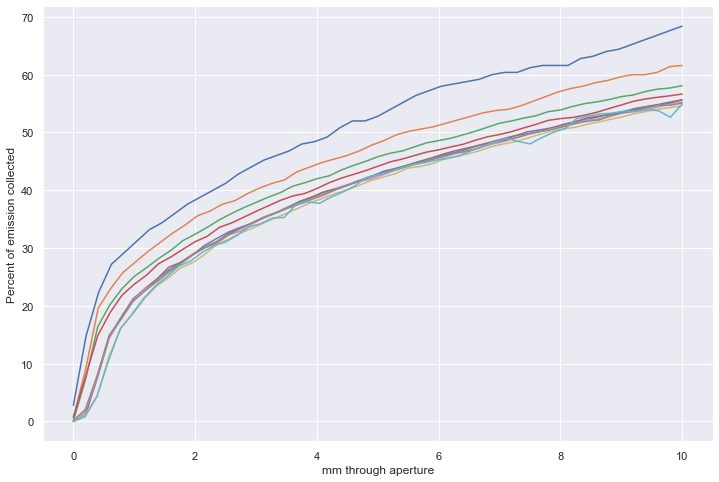

In [279]:
All_x = []
All_y = []
plt.figure(figsize = (12,8))
for run in range(len(Emissions)):
    #print("_"*60)
    x_mindex = np.where(All_Emissions_Avg[run,:,1] == min(All_Emissions_Avg[run,:len(All_Emissions_Avg[run,:,1]),1]))[0][0]
    #print(x_mindex)
    random = 0
    inarow = 0
    for i in range(len(All_Emissions_Avg[run,:,1])):
        if abs(All_Emissions_Avg[run,i,1]) > 3e-3:
            x_maxdex = i-1
            break
    #print(x_maxdex)
    xs = (max(All_Emissions_Avg[run,x_maxdex:x_mindex,0]) - All_Emissions_Avg[run,x_maxdex:x_mindex,0])/ \
        (max(All_Emissions_Avg[run,x_maxdex:x_mindex,0]) - min(All_Emissions_Avg[run,x_maxdex:x_mindex,0]))*10
    
    ys = abs(All_Emissions_Avg[run,x_maxdex:x_mindex,1]/Emissions[run]*1000)*100
    
    plt.plot(xs,ys)
    All_x.append(xs)
    All_y.append(ys)
    

    #plt.gca().invert_yaxis()
plt.xlabel('mm through aperture')
plt.ylabel('Percent of emission collected');